In [1]:
# Assuming that the fridom package is in the parent directory
# If fridom is installed, the next two lines are not needed
import sys, os
sys.path.append(os.path.abspath('..'))

import fridom.NonHydrostatic as nh

# Plotting Field Variables
Field variables have a built-in plotting for quick visualization. For more advanced plotting, standard Python packages such as matplotlib can be used.

## The plot object
A plot object can be created from any field variable by getting the `.plot` attribute. From the plot object, we can create section plots of the field variable, or a 3D interactive volume plot.

In [2]:
# create a field to plot
mset = nh.ModelSettings(gpu=True)
grid = nh.Grid(mset)
z_wave = nh.InitialConditions.SingleWave(mset, grid)

# get a plot object of the buoyancy field
plot_buoyancy = nh.Plot(z_wave.b)

## Front Section

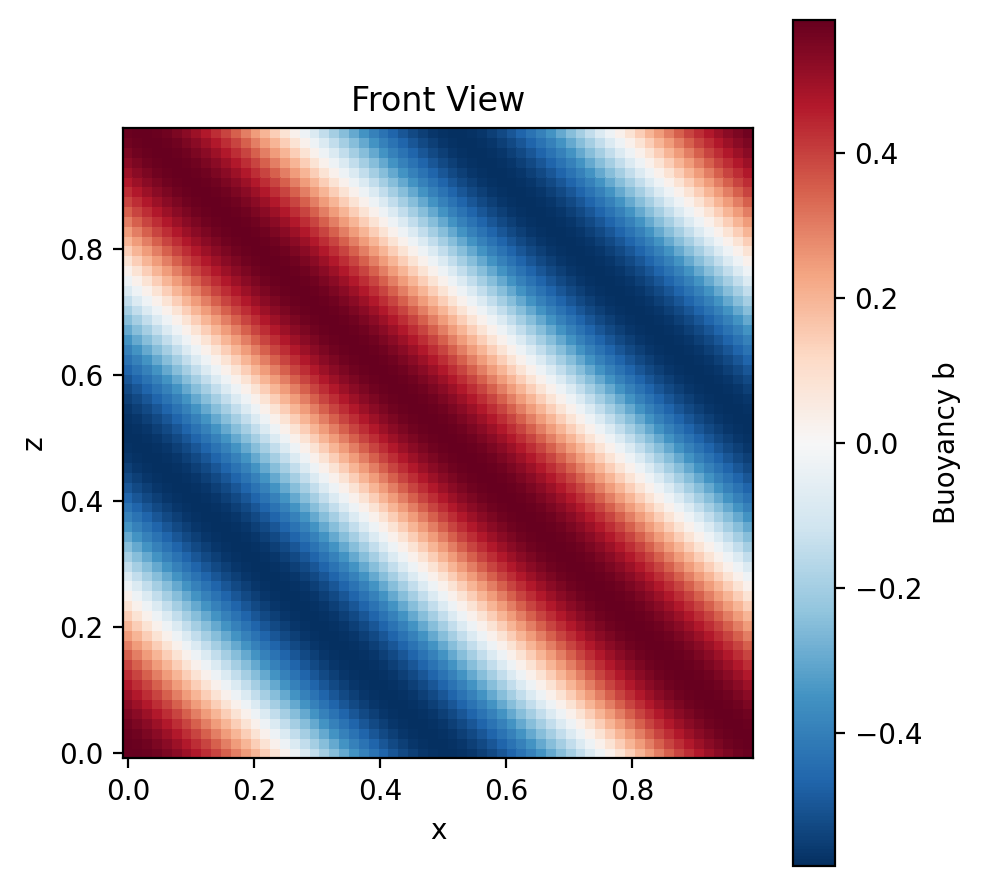

In [3]:
plot_buoyancy.front()
# optional arguments:
#   state: state vector to also plot the velocity field
#   y    : y coordinate of the section (float, default: 0)
#   yi   : y coordinate index of the section (int)
#   cmin : minimum value of the colormap
#   cmax : maximum value of the colormap 
#   cmap : colormap (matplotlib colormaps)
#   vmax : velocity of one arrow length unit
#   fig  : matplotlib figure object to plot on

## Top section
For all the section plots, the velocity field can be plotted when giving the state vector as an argument.

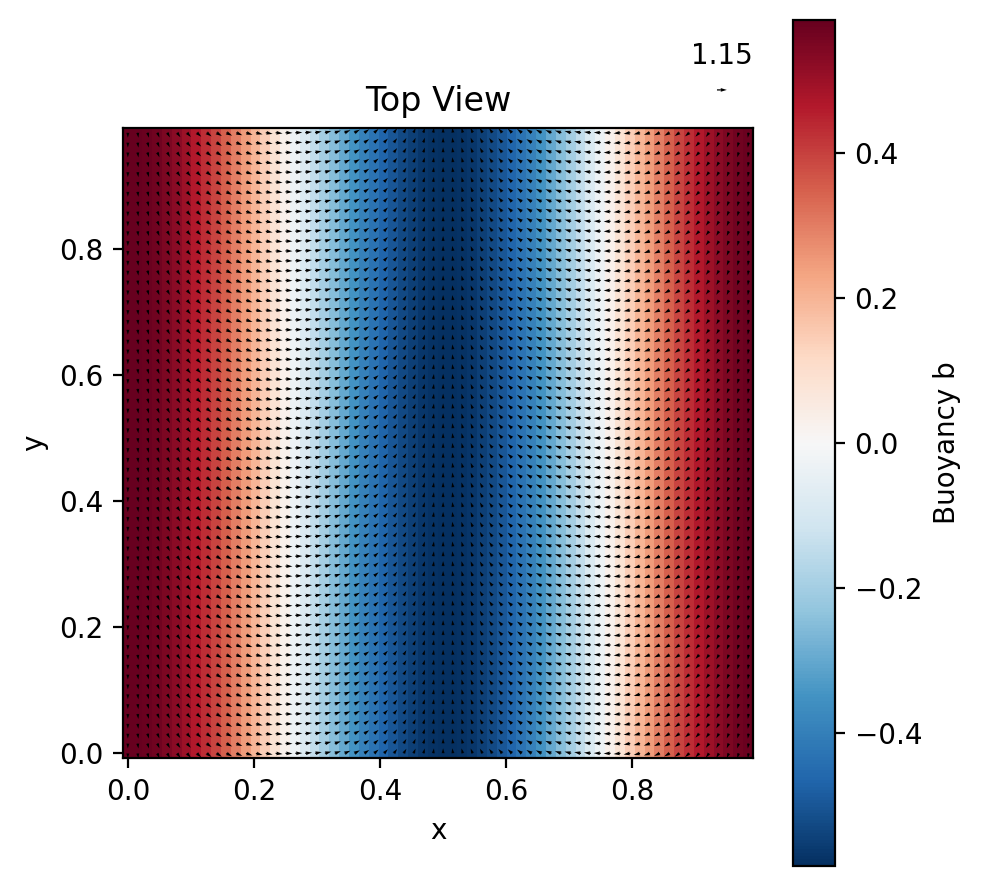

In [4]:
plot_buoyancy.top(state=z_wave)
# same optional arguments as above (but z instead of y)

## Side section
The full plot can be done in one line:

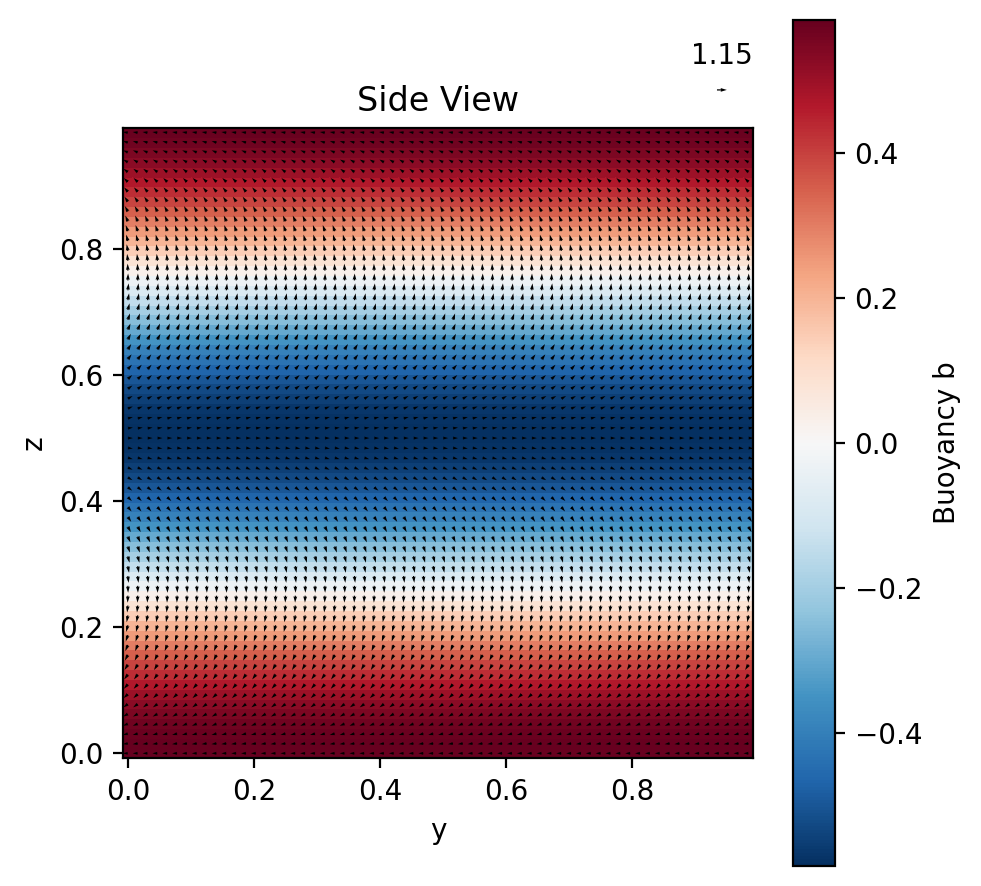

In [5]:
nh.Plot(z_wave.b).side(state=z_wave)
# same optional arguments as above (but x as the coordinate selection)

## All sections combined
Plot the kinetic energy of the Jet initial state


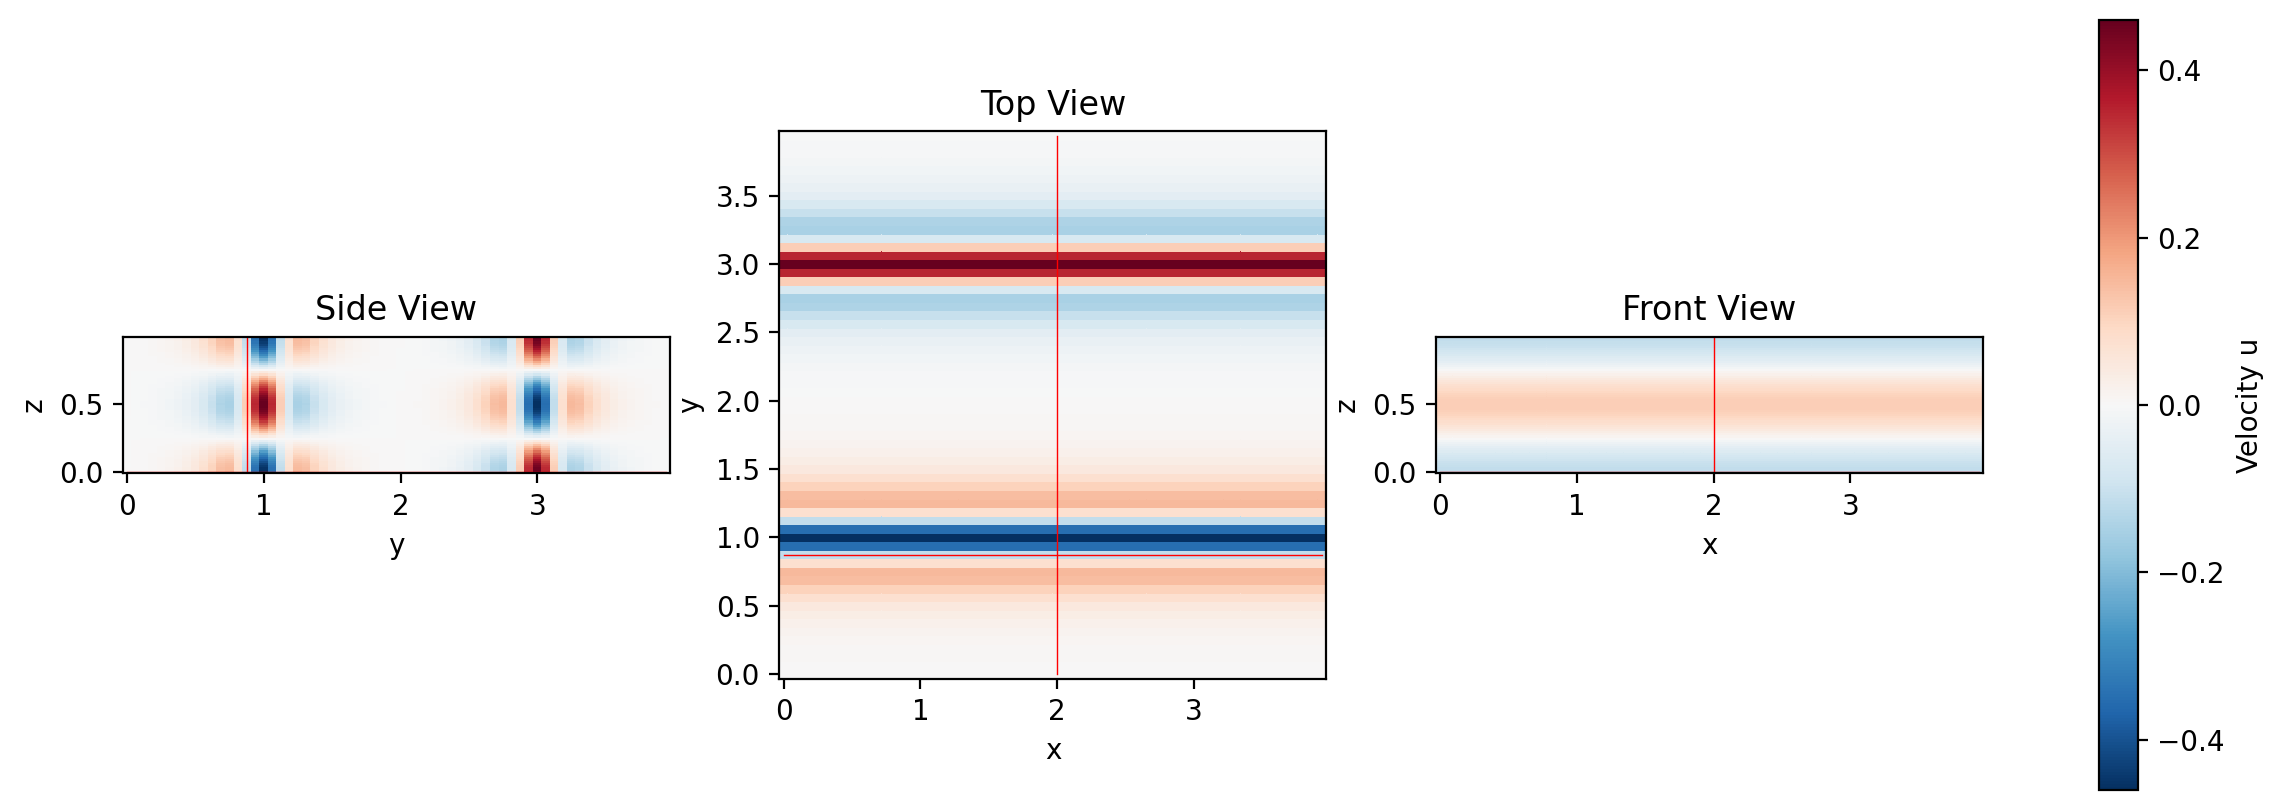

In [6]:
mset_copy = mset.copy()
mset_copy.L = [4, 4, 1]

z_jet = nh.InitialConditions.Jet(mset_copy, nh.Grid(mset_copy), geo_proj=True)
nh.Plot(z_jet.u).sec(y = 0.9, x=2)
# optional arguments the same as above

## 3D Volume plot

In [ ]:
nh.Plot(z_jet.pot_vort()).vol()
# optional arguments:
#   cmax    : maximum value of the colormap
#   cmin    : minimum value of the colormap
#   cmap    : colormap (matplotlib colormaps)
#   opacity : opacity of the volume plot (float, default: 0.8)
#   fig     : plotly figure object to plot in (default: new figure)
#   show    : show the figure (default: True)